In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
df = pd.read_excel("Cap project.xls", engine="xlrd")
df.head()

,Tanggal1,Banten,Tanggal2,Jakarta,Tanggal3,Jabar,Tanggal4,Jateng,Tanggal5,Yogyakarta,Tanggal6,Jatim
0,2019-01-01,10300.0,2019-01-01,12050,2019-01-01,12000,2019-01-01,11500.0,2019-01-01,11400,2019-01-01,11500
1,2019-02-01,10650.0,2019-02-01,12250,2019-02-01,12400,2019-02-01,11500.0,2019-02-01,11400,2019-02-01,11500
2,2019-03-01,10600.0,2019-03-01,12100,2019-03-01,12500,2019-03-01,11500.0,2019-03-01,11250,2019-03-01,11500
3,2019-04-01,10400.0,2019-04-01,12050,2019-04-01,12400,2019-04-01,11500.0,2019-04-01,11250,2019-04-01,11500
4,2019-05-01,10250.0,2019-05-01,11850,2019-05-01,12150,2019-05-01,11250.0,2019-05-01,11000,2019-05-01,11500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tanggal1     60 non-null     datetime64[ns]
 1   Banten       60 non-null     float64       
 2   Tanggal2     60 non-null     datetime64[ns]
 3   Jakarta      60 non-null     int64         
 4   Tanggal3     60 non-null     datetime64[ns]
 5   Jabar        60 non-null     int64         
 6   Tanggal4     60 non-null     datetime64[ns]
 7   Jateng       60 non-null     float64       
 8   Tanggal5     60 non-null     datetime64[ns]
 9   Yogyakarta   60 non-null     int64         
 10  Tanggal6     60 non-null     datetime64[ns]
 11  Jatim        60 non-null     int64         
dtypes: datetime64[ns](6), float64(2), int64(4)
memory usage: 5.8 KB


In [6]:
df.isnull().sum()

Tanggal1       0
Banten         0
Tanggal2       0
Jakarta        0
Tanggal3       0
Jabar          0
Tanggal4       0
Jateng         0
Tanggal5       0
Yogyakarta     0
Tanggal6       0
Jatim          0
dtype: int64

## BANTEN

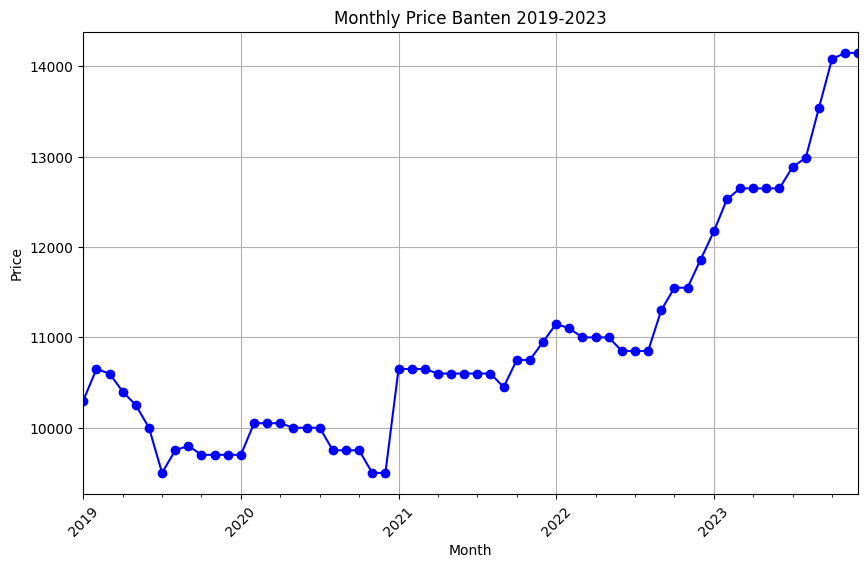

In [7]:
# Plot Harga Beras di Banten
monthly_price_ban = df.groupby(df['Tanggal1'].dt.to_period('M'))['Banten'].sum()
plt.figure(figsize=(10, 6))
monthly_price_ban.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Banten 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

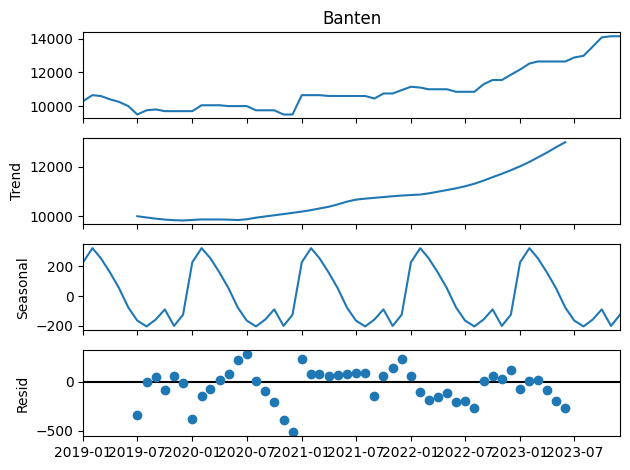

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal1', inplace=True)

# Fokus pada data Jakarta
banten = df['Banten']

# Decompose data
result = seasonal_decompose(banten)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


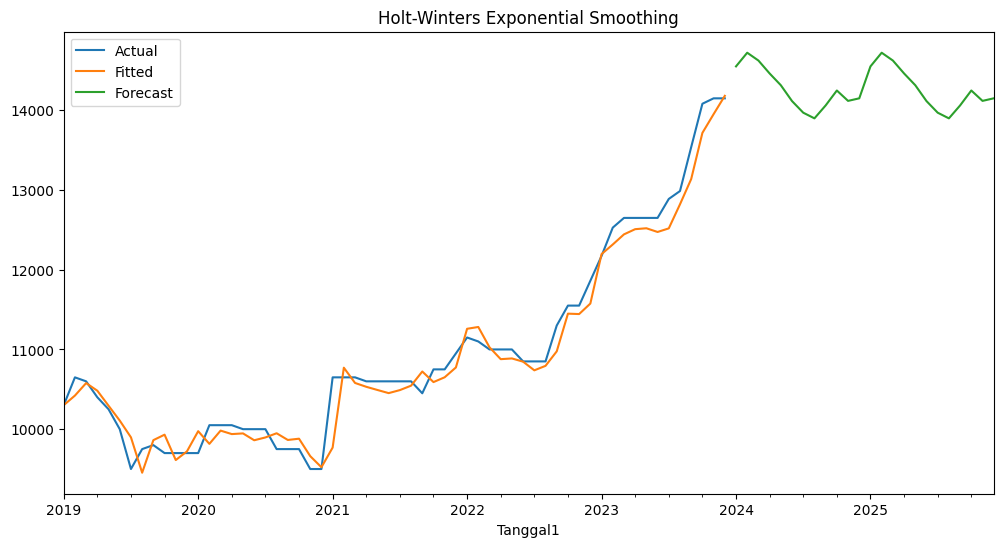

In [9]:
# Split data untuk training
train = banten.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend=None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [10]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.43%


In [11]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    14550.744125
2024-02-01    14722.143824
2024-03-01    14624.118683
2024-04-01    14461.905408
2024-05-01    14314.293057
2024-06-01    14115.417335
2024-07-01    13969.918352
2024-08-01    13898.854868
2024-09-01    14060.904102
2024-10-01    14248.205098
2024-11-01    14117.996935
2024-12-01    14150.155493
2025-01-01    14550.744125
2025-02-01    14722.143824
2025-03-01    14624.118683
2025-04-01    14461.905408
2025-05-01    14314.293057
2025-06-01    14115.417335
2025-07-01    13969.918352
2025-08-01    13898.854868
2025-09-01    14060.904102
2025-10-01    14248.205098
2025-11-01    14117.996935
2025-12-01    14150.155493
Freq: MS, dtype: float64


## JAKARTA

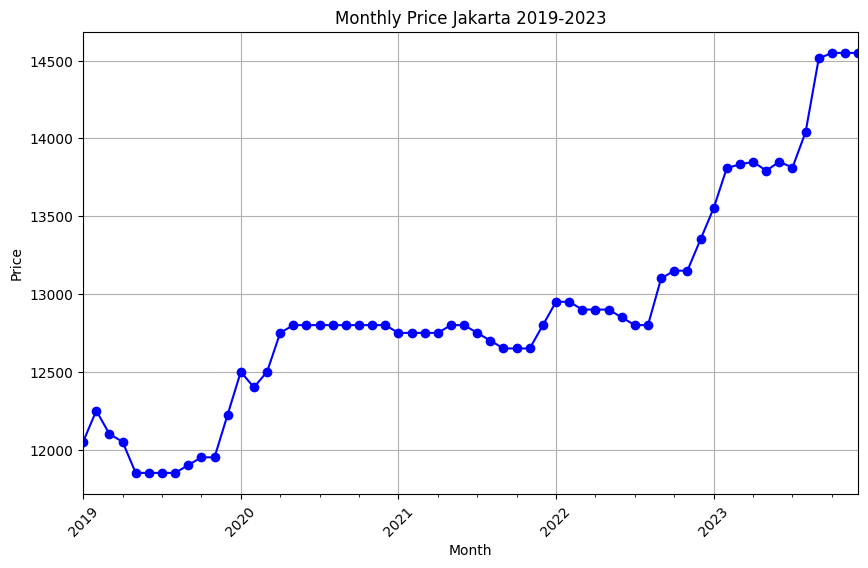

In [12]:
# Plot Harga Beras di Jakarta
monthly_price_jak = df.groupby(df['Tanggal2'].dt.to_period('M'))['Jakarta'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jak.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jakarta 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

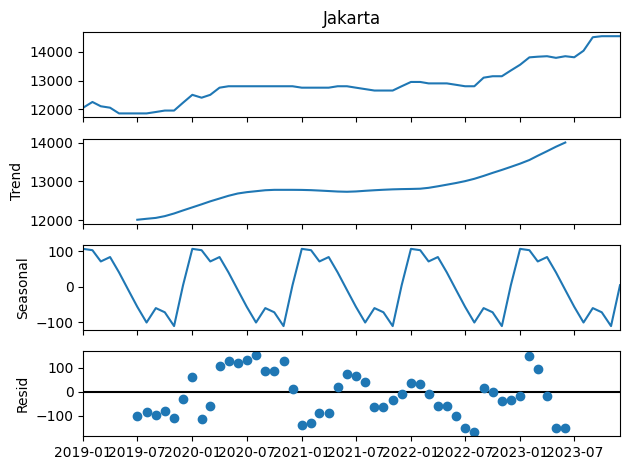

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal2', inplace=True)

# Fokus pada data Jakarta
jakarta = df['Jakarta']

# Decompose data
result = seasonal_decompose(jakarta)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


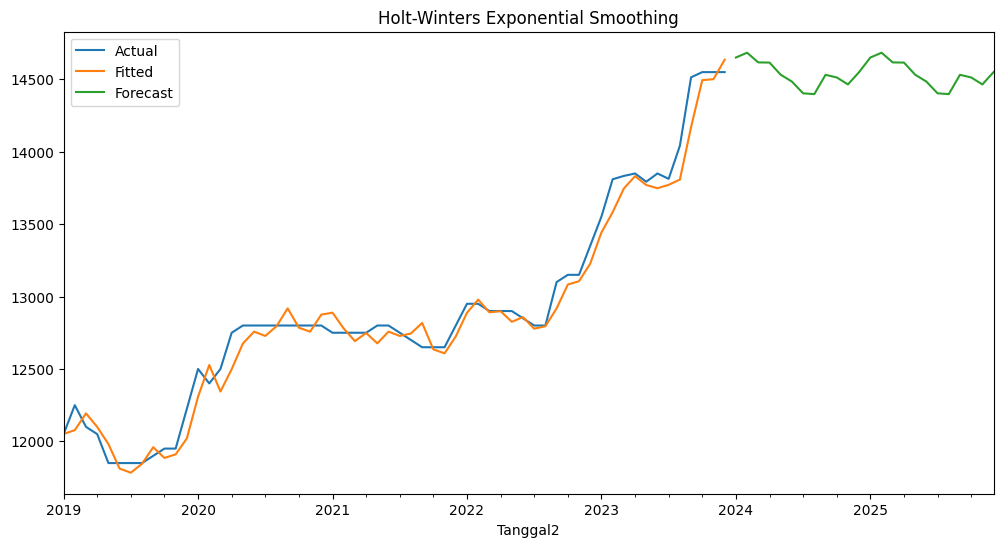

In [14]:
# Split data untuk training
train = jakarta.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend=None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()



In [15]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 0.63%


In [16]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)
df_forecast1 = pd.DataFrame(forecast_values)
# Menyimpan DataFrame ke file CSV (opsional)
df_forecast1.to_csv('forecast_24_months.csv', index=False)

Forecast untuk 24 bulan ke depan:
2024-01-01    14650.799541
2024-02-01    14683.973108
2024-03-01    14617.081912
2024-04-01    14615.983287
2024-05-01    14532.059177
2024-06-01    14484.741507
2024-07-01    14403.496919
2024-08-01    14398.128561
2024-09-01    14531.317045
2024-10-01    14513.317331
2024-11-01    14465.067835
2024-12-01    14550.427923
2025-01-01    14650.799541
2025-02-01    14683.973108
2025-03-01    14617.081912
2025-04-01    14615.983287
2025-05-01    14532.059177
2025-06-01    14484.741507
2025-07-01    14403.496919
2025-08-01    14398.128561
2025-09-01    14531.317045
2025-10-01    14513.317331
2025-11-01    14465.067835
2025-12-01    14550.427923
Freq: MS, dtype: float64


## JAWA BARAT

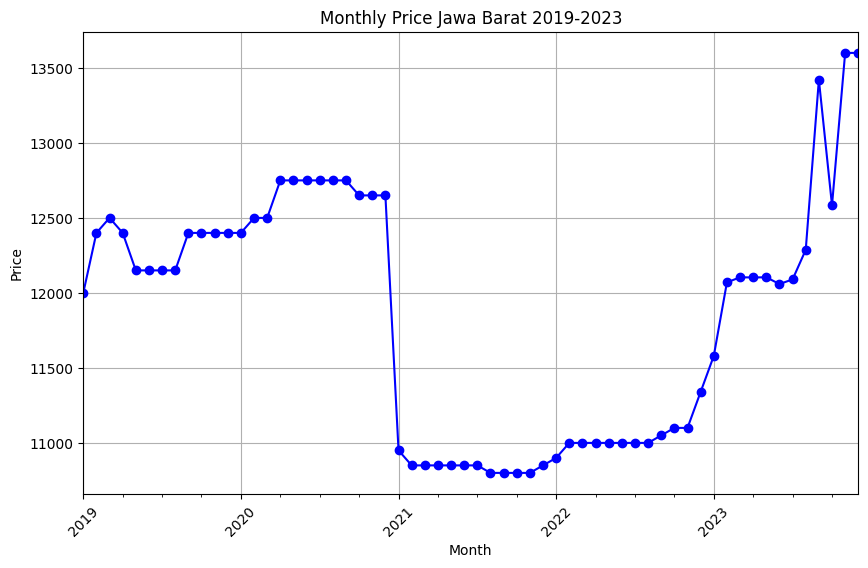

In [17]:
# Plot Harga Beras di Jawa Barat
monthly_price_jab = df.groupby(df['Tanggal3'].dt.to_period('M'))['Jabar'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jab.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Barat 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

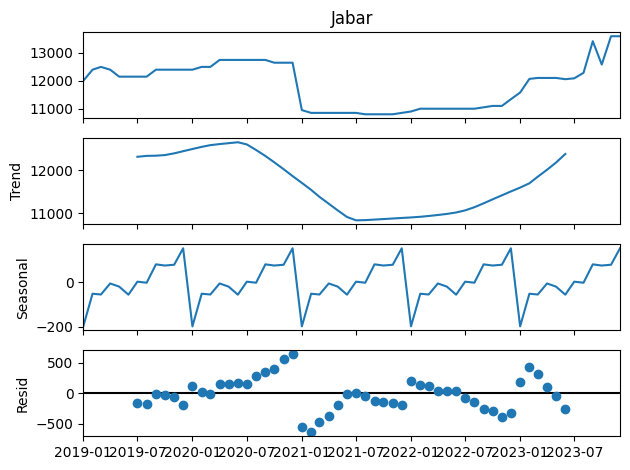

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal3', inplace=True)

# Fokus pada data Jakarta
jabar = df['Jabar']

# Decompose data
result = seasonal_decompose(jabar)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


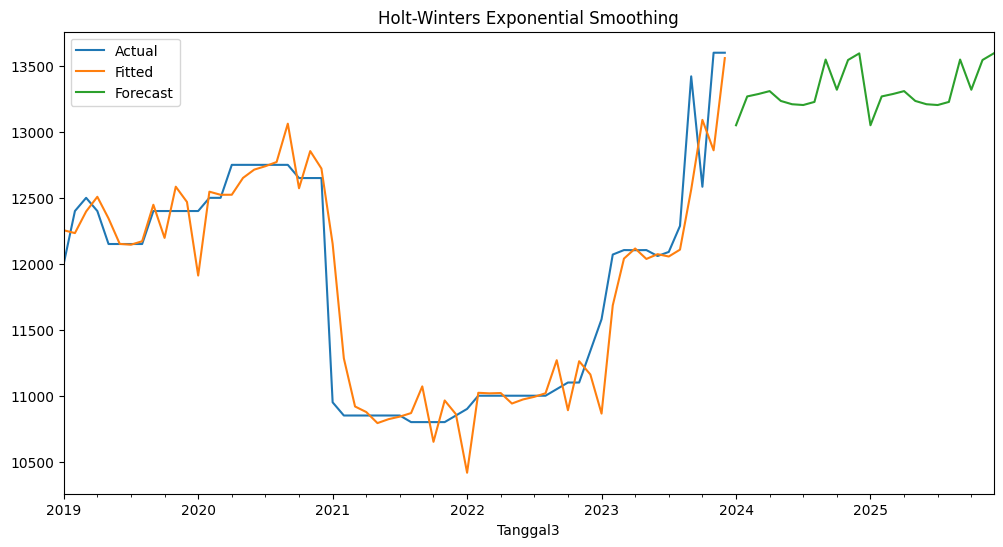

In [19]:
# Split data untuk training
train = jabar.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend= None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [20]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.47%


In [21]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    13050.171634
2024-02-01    13268.677683
2024-03-01    13287.054602
2024-04-01    13309.021129
2024-05-01    13234.473123
2024-06-01    13209.503892
2024-07-01    13203.569536
2024-08-01    13227.116186
2024-09-01    13548.117835
2024-10-01    13319.441441
2024-11-01    13544.858147
2024-12-01    13594.984999
2025-01-01    13050.171634
2025-02-01    13268.677683
2025-03-01    13287.054602
2025-04-01    13309.021129
2025-05-01    13234.473123
2025-06-01    13209.503892
2025-07-01    13203.569536
2025-08-01    13227.116186
2025-09-01    13548.117835
2025-10-01    13319.441441
2025-11-01    13544.858147
2025-12-01    13594.984999
Freq: MS, dtype: float64


## JAWA TENGAH

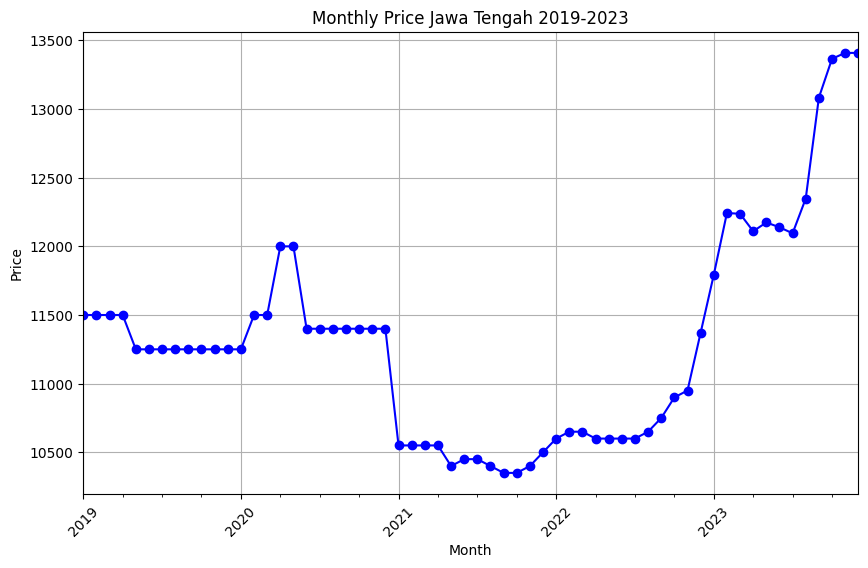

In [22]:
# Plot Harga Beras di Jawa Tengah
monthly_price_jat = df.groupby(df['Tanggal4'].dt.to_period('M'))['Jateng'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jat.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Tengah 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

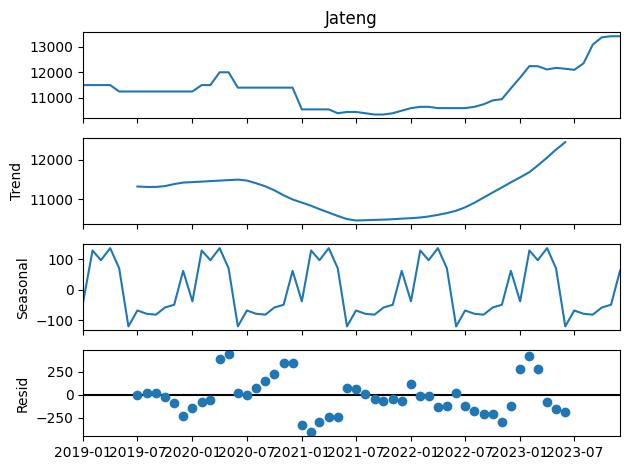

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal4', inplace=True)

# Fokus pada data Jawa Tengah
jateng = df['Jateng']

# Decompose data
result = seasonal_decompose(jateng)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


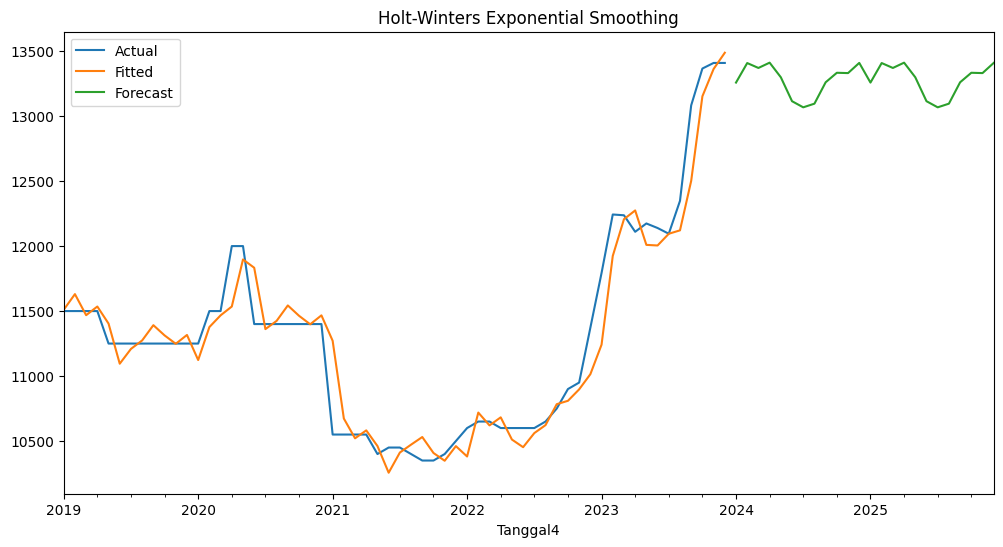

In [24]:
# Split data untuk training
train = jateng.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend=None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [25]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.14%


In [26]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    13257.948261
2024-02-01    13408.195364
2024-03-01    13370.453013
2024-04-01    13411.208994
2024-05-01    13298.791632
2024-06-01    13114.626332
2024-07-01    13067.551643
2024-08-01    13095.703495
2024-09-01    13260.166739
2024-10-01    13333.412991
2024-11-01    13330.962277
2024-12-01    13409.392449
2025-01-01    13257.948261
2025-02-01    13408.195364
2025-03-01    13370.453013
2025-04-01    13411.208994
2025-05-01    13298.791632
2025-06-01    13114.626332
2025-07-01    13067.551643
2025-08-01    13095.703495
2025-09-01    13260.166739
2025-10-01    13333.412991
2025-11-01    13330.962277
2025-12-01    13409.392449
Freq: MS, dtype: float64


## Yogyakarta

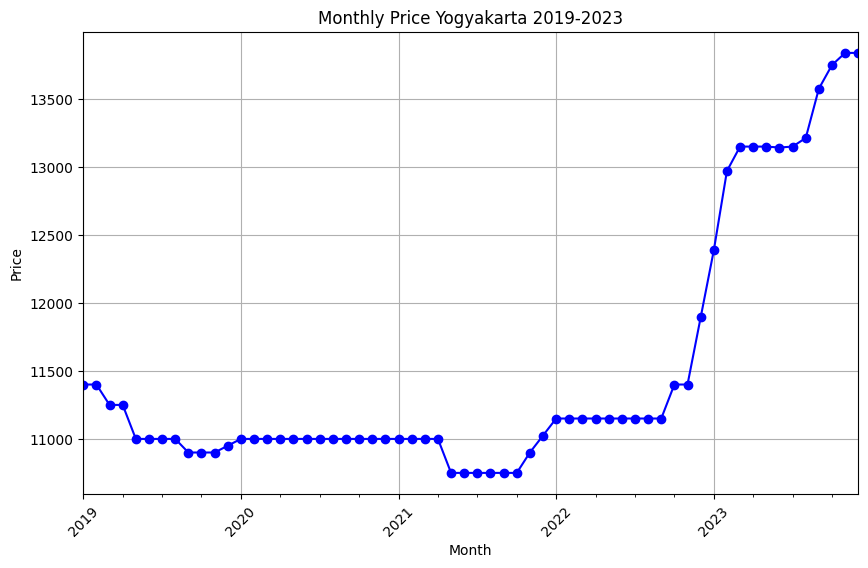

In [27]:
# Plot Harga Beras di Yogyakarta
monthly_price_yog = df.groupby(df['Tanggal5'].dt.to_period('M'))['Yogyakarta '].sum()
plt.figure(figsize=(10, 6))
monthly_price_yog.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Yogyakarta 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

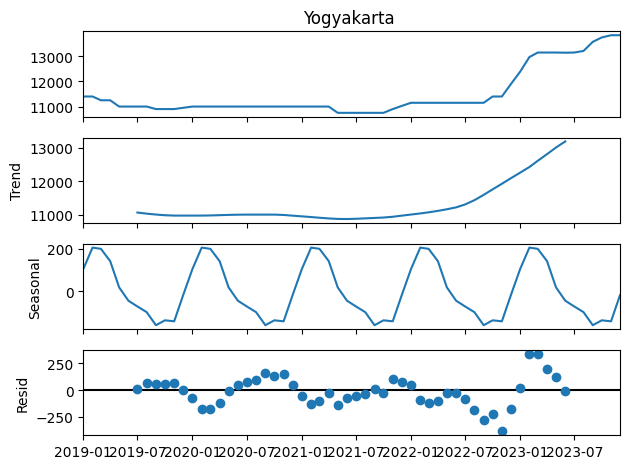

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal5', inplace=True)

# Fokus pada data Yogyakarta 
yogyakarta = df['Yogyakarta ']

# Decompose data
result = seasonal_decompose(yogyakarta)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


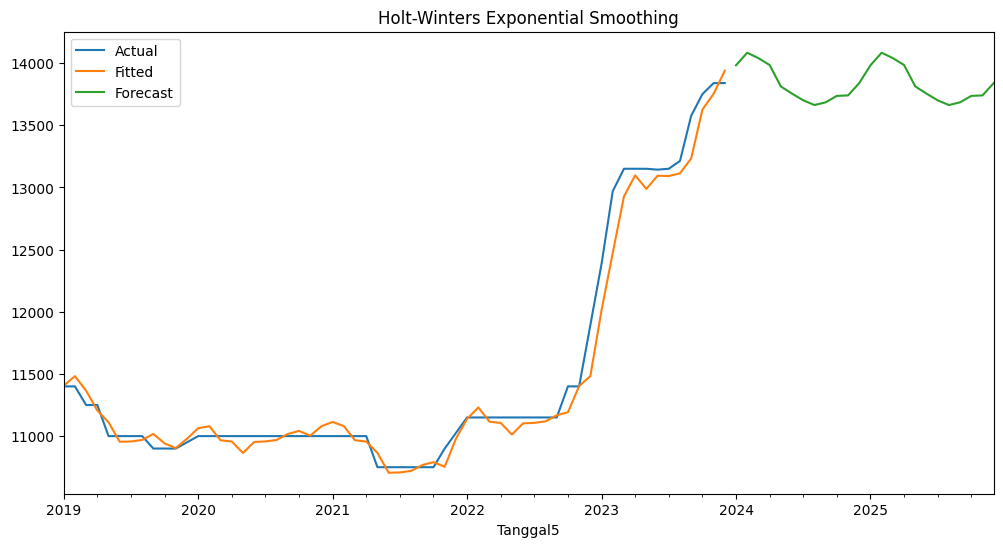

In [29]:
# Split data untuk training
train = yogyakarta.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend= None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [30]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 0.74%


In [31]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    13982.344558
2024-02-01    14083.306108
2024-03-01    14039.605469
2024-04-01    13984.305175
2024-05-01    13812.135178
2024-06-01    13754.284968
2024-07-01    13700.553253
2024-08-01    13662.537187
2024-09-01    13684.410300
2024-10-01    13736.118284
2024-11-01    13740.107601
2024-12-01    13839.497272
2025-01-01    13982.344558
2025-02-01    14083.306108
2025-03-01    14039.605469
2025-04-01    13984.305175
2025-05-01    13812.135178
2025-06-01    13754.284968
2025-07-01    13700.553253
2025-08-01    13662.537187
2025-09-01    13684.410300
2025-10-01    13736.118284
2025-11-01    13740.107601
2025-12-01    13839.497272
Freq: MS, dtype: float64


## Jawa Timur

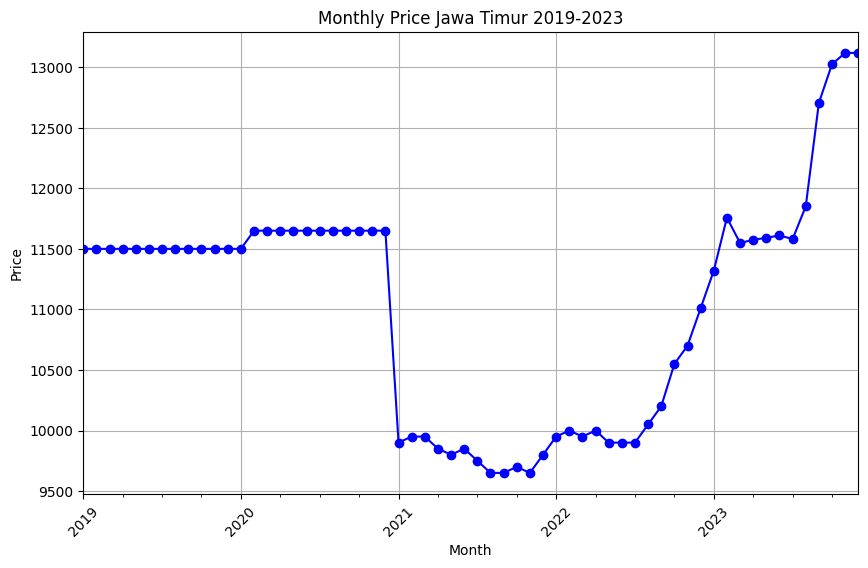

In [32]:
# Plot Harga Beras di Jawa Timur
monthly_price_jat = df.groupby(df['Tanggal6'].dt.to_period('M'))['Jatim'].sum()
plt.figure(figsize=(10, 6))
monthly_price_jat.plot(kind='line', marker='o', color='b')
plt.title('Monthly Price Jawa Timur 2019-2023')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

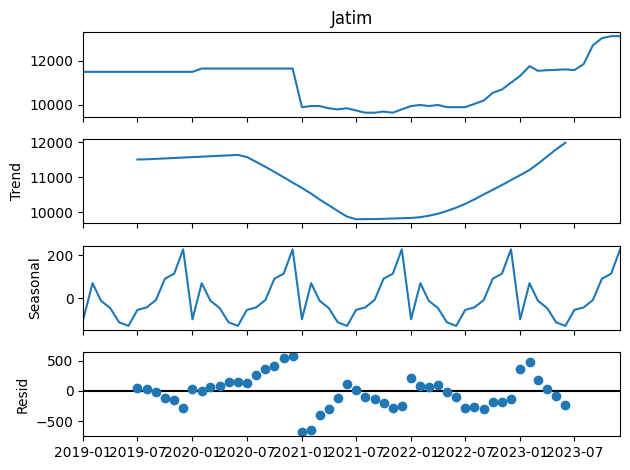

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.set_index('Tanggal6', inplace=True)

# Fokus pada data Jawa Timur
jatim = df['Jatim']

# Decompose data
result = seasonal_decompose(jatim)

# Plot hasil decomposition
result.plot()
plt.show()

c:\Users\naila\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


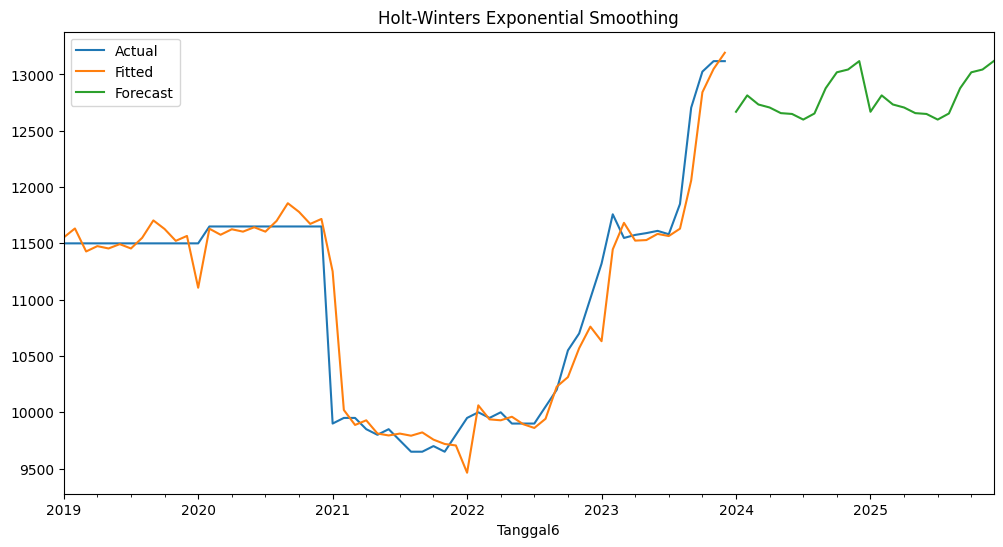

In [34]:
# Split data untuk training
train = jatim.iloc[:60]

# Model Holt-Winters
model = ExponentialSmoothing(
    train,
    seasonal='mul',  # Gunakan 'add' atau 'mul'
    seasonal_periods=12,
    trend= None
).fit()

# Plot
plt.figure(figsize=(12, 6))
train.plot(label='Actual', legend=True)
model.fittedvalues.plot(label='Fitted', legend=True)
model.forecast(24).plot(label='Forecast', legend=True)
plt.title("Holt-Winters Exponential Smoothing")
plt.show()

In [35]:
# Menghitung nilai fitted dan actual
fitted_values = model.fittedvalues
actual_values = train

# Menghitung MAPE
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 1.24%


In [36]:
# Forecast untuk 24 bulan ke depan
forecast_values = model.forecast(24)

# Print hasil forecast
print("Forecast untuk 24 bulan ke depan:")
print(forecast_values)

Forecast untuk 24 bulan ke depan:
2024-01-01    12668.531002
2024-02-01    12813.966463
2024-03-01    12733.127132
2024-04-01    12706.355337
2024-05-01    12656.442118
2024-06-01    12649.099750
2024-07-01    12599.221358
2024-08-01    12653.179638
2024-09-01    12877.111335
2024-10-01    13019.014377
2024-11-01    13043.642090
2024-12-01    13118.373022
2025-01-01    12668.531002
2025-02-01    12813.966463
2025-03-01    12733.127132
2025-04-01    12706.355337
2025-05-01    12656.442118
2025-06-01    12649.099750
2025-07-01    12599.221358
2025-08-01    12653.179638
2025-09-01    12877.111335
2025-10-01    13019.014377
2025-11-01    13043.642090
2025-12-01    13118.373022
Freq: MS, dtype: float64


## PERBANDINGAN PREDIKSI VS AKTUAL BERAS DI JAWA TIMUR TAHUN 2024

In [37]:
# Data forecast model
data_forecast = {
    "Tanggal": [
        "2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01",
        "2024-05-01", "2024-06-01", "2024-07-01", "2024-08-01",
        "2024-09-01", "2024-10-01", "2024-11-01", "2024-12-01"
    ],
    "Forecast": [
        12668.531002, 12813.966463, 12733.127132, 12706.355337,
        12656.442118, 12649.099750, 12599.221358, 12653.179638,
        12877.111335, 13019.014377, 13043.642090, 13118.373022
    ]
}

# Membuat DataFrames
df_forecast = pd.DataFrame(data_forecast)
df_forecast['Tanggal'] = pd.to_datetime(df_forecast['Tanggal'])
print(df_forecast)

      Tanggal      Forecast
0  2024-01-01  12668.531002
1  2024-02-01  12813.966463
2  2024-03-01  12733.127132
3  2024-04-01  12706.355337
4  2024-05-01  12656.442118
5  2024-06-01  12649.099750
6  2024-07-01  12599.221358
7  2024-08-01  12653.179638
8  2024-09-01  12877.111335
9  2024-10-01  13019.014377
10 2024-11-01  13043.642090
11 2024-12-01  13118.373022


In [38]:
import pandas as pd

# Data dalam bentuk dictionary
data = {
    "Tanggal": [
        "2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01",
        "2024-05-01", "2024-06-01", "2024-07-01", "2024-08-01",
        "2024-09-01", "2024-10-01", "2024-11-01", "2024-12-01"
    ],
    "Actual": [
        12910, 12850, 12980, 12810, 12220, 
        12520, 12540, 12630, 12540, 12610, 
        12650, 12480
    ]
}

# Membuat DataFrame
df_actual = pd.DataFrame(data)

# Jika ingin mengubah kolom 'Tanggal' menjadi tipe datetime
df_actual['Tanggal'] = pd.to_datetime(df_actual['Tanggal'])

# Menampilkan DataFrame
print(df_actual)


      Tanggal  Actual
0  2024-01-01   12910
1  2024-02-01   12850
2  2024-03-01   12980
3  2024-04-01   12810
4  2024-05-01   12220
5  2024-06-01   12520
6  2024-07-01   12540
7  2024-08-01   12630
8  2024-09-01   12540
9  2024-10-01   12610
10 2024-11-01   12650
11 2024-12-01   12480


In [39]:
# Gabungkan berdasarkan tanggal
df_merged = pd.merge(df_actual, df_forecast, on='Tanggal')

# Hitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(abs((df_merged['Actual'] - df_merged['Forecast']) / df_merged['Actual'])) * 100

# Menampilkan MAPE
print("MAPE: {:.2f}%".format(mape))

MAPE: 2.02%


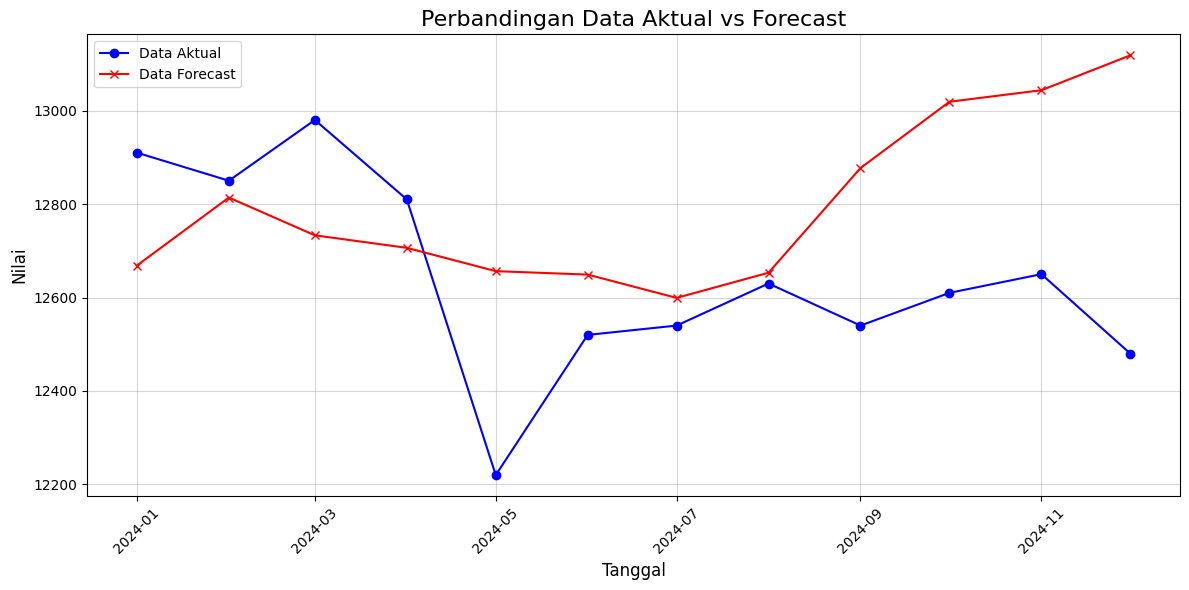

      Tanggal  Actual      Forecast
0  2024-01-01   12910  12668.531002
1  2024-02-01   12850  12813.966463
2  2024-03-01   12980  12733.127132
3  2024-04-01   12810  12706.355337
4  2024-05-01   12220  12656.442118
5  2024-06-01   12520  12649.099750
6  2024-07-01   12540  12599.221358
7  2024-08-01   12630  12653.179638
8  2024-09-01   12540  12877.111335
9  2024-10-01   12610  13019.014377
10 2024-11-01   12650  13043.642090
11 2024-12-01   12480  13118.373022


In [ ]:
# Plot Data Aktual vs Forecast
plt.figure(figsize=(12, 6))
plt.plot(df_merged['Tanggal'], df_merged['Actual'], label='Data Aktual', marker='o', color='blue')
plt.plot(df_merged['Tanggal'], df_merged['Forecast'], label='Data Forecast', marker='x', color='red')

# Menambahkan detail pada plot
plt.title('Perbandingan Data Aktual vs Forecast', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.xticks(rotation=45)  # Memutar label tanggal agar lebih mudah dibaca
plt.tight_layout()

# Tampilkan plot
plt.show()

# Tampilkan actual vs prediksi
print(df_merged)